In [1]:
%load_ext sppl.magics
%matplotlib inline

In [2]:
%%sppl model
perfB1 ~= binom(n=100, p=.9); condition (80 <= perfB1)
skillA ~= poisson(mu=100)
condition ((77 <= skillA) <  125)
switch (skillA) cases (s in range(77, 125)):
    perfA1 ~= binom(n=s, p=.9)
    switch (perfB1) cases (b in range(80, 101)):
        if (perfA1 > b):
            result ~= atomic(loc=1)
        else:
            result ~= atomic(loc=0)

In [3]:
n = %sppl_get_namespace model
modelc = n.model.condition(n.result << {0})

In [4]:
xs = range(50, 120)
perfA_prior = [n.model.prob(n.perfA1 << {i}) for i in xs]
perfA_posterior = [modelc.prob(n.perfA1 << {i}) for i in xs]

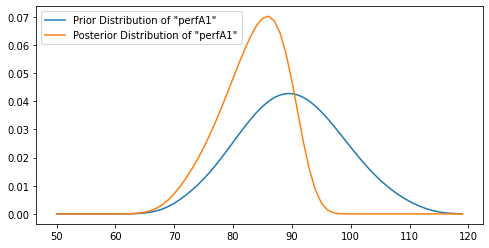

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(xs, perfA_prior, label='Prior Distribution of "perfA1"')
ax.plot(xs, perfA_posterior, label='Posterior Distribution of "perfA1"')
ax.legend(loc='upper left')
fig.set_size_inches(8,4)